In [2]:
from transformers import GPT2LMHeadModel

In [3]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") #124M model
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [2]:
from transformers import pipeline
generator = pipeline('text-generation', model='gpt2')
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Hello, I\'m a language model, so I\'m a master of the whole language-solving process. I\'m in my mid-20s," he said. "I don\'t really know how many times I\'ve thought about it like this, but I\'m really, really happy with it."\n\nHe went on to describe how it\'s done in many different ways, from the basic idea, to the language model itself.\n\n"It\'s actually pretty simple, it\'s called a language model, but it\'s also the way I think about it," he said. "I think it is a very useful tool for making a lot of decisions about your language and learning to use it. It\'s a tool that will help me to understand the language, because you can really read how we speak, what language we\'re talking about, which languages we\'re talking about and what languages we\'re talking about. We\'re so far from having a fully functional language yet. It\'s just something that will be useful to me when I\'m able to see how it\'s being used, and how it\'s being used in practice."\n\nHis f

{'val': [(0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750), (10.9762, 5.9954, 5.1825, 4.5888, 4.2707, 4.099, 3.9746, 3.8817, 3.8148, 3.7597, 3.7094, 3.6673, 3.6277, 3.5949, 3.5655, 3.5366, 3.5141, 3.4978, 3.4844, 3.394)], 'hella': [(0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, 4767), (0.2463, 0.2443, 0.2346, 0.2497, 0.2554, 0.2591, 0.2592, 0.2561, 0.2544, 0.2637, 0.2585, 0.2613, 0.2659, 0.2678, 0.2665, 0.2704, 0.2722, 0.2679, 0.2686, 0.2671, 0.266)]}
Min Train Loss: 3.394
Min Validation Loss: 3.394
Max Hellaswag eval: 0.2722


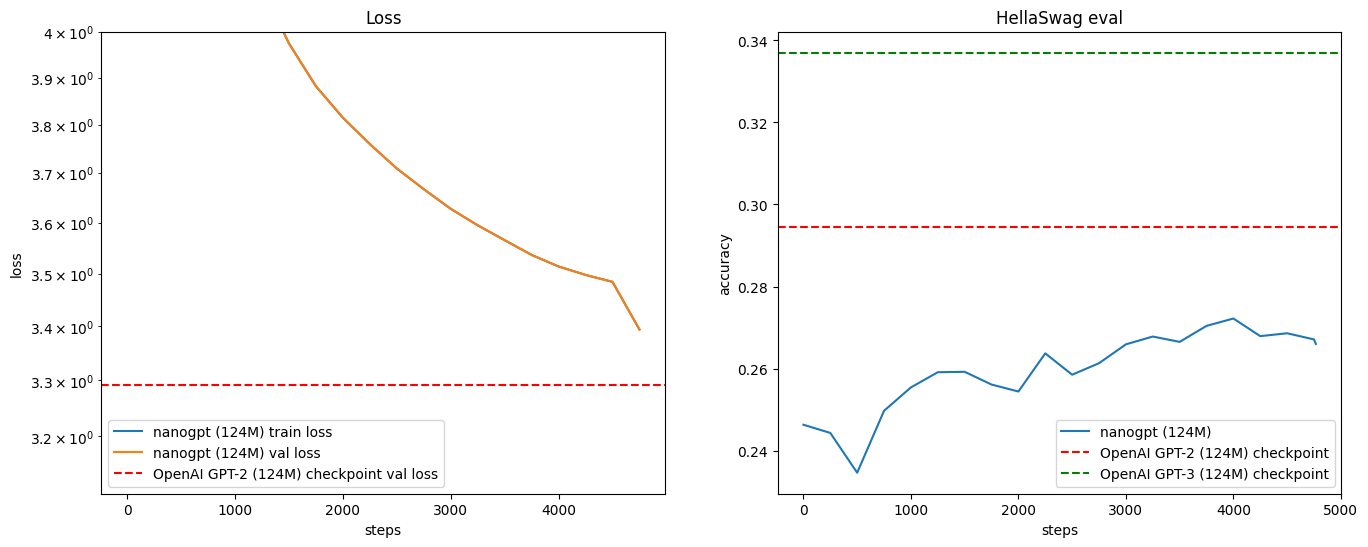

In [5]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]
hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

# load the log file
with open("log/log.txt", "r") as f:
    lines = f.readlines()
    
# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)


# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

print(streams_xy)
# create figure
plt.figure(figsize=(16, 6))

# Panel 1: losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["val"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"] # validation loss
plt.plot(xs, ys, label=f'nanogpt ({sz}) val loss')
# horizontal line at GPT-2 baseline
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint val loss")
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(top=4.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

# Panel 2: HellaSwag eval
plt.subplot(122)
xs, ys = streams_xy["hella"] # HellaSwag eval
ys = np.array(ys)
plt.plot(xs, ys, label=f"nanogpt ({sz})")
# horizontal line at GPT-2 baseline
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("HellaSwag eval")
print("Max Hellaswag eval:", max(ys))

In [34]:
import torch
import torch
import torch.nn as nn
from torch.nn import functional as F
import math
import tiktoken
import inspect
from torch.distributed import init_process_group, destroy_process_group
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist
import os
import numpy as np
from hellaswag import render_example, iterate_examples
from config import GPTConfig
from config import GPTConfig
from transformer import GPT

In [38]:
checkpoint = torch.load("./model_04000.pt", map_location=torch.device('cpu'), weights_only=False)
model = GPT(checkpoint['config'])

# Remove _orig_mod. prefix from state dict keys
state_dict = checkpoint['model']
unwrapped_state_dict = {}
for k, v in state_dict.items():
    if k.startswith('_orig_mod.'):
        # Remove the _orig_mod. prefix
        new_key = k[len('_orig_mod.'):]
        unwrapped_state_dict[new_key] = v
    else:
        unwrapped_state_dict[k] = v

# Now load the cleaned state dict
model.load_state_dict(unwrapped_state_dict)
model.eval()
print(f"Model loaded from step {checkpoint['step']}")
print(f"Validation loss: {checkpoint['val_loss']}")

Model loaded from step 4000
Validation loss: 3.514080047607422


In [43]:
enc = tiktoken.get_encoding('gpt2')
num_return_sequences = 4
max_length = 32
tokens = enc.encode("Hello, I'm a language model,")
tokens = torch.tensor(tokens, dtype=torch.long)
tokens = tokens.unsqueeze(0).repeat(num_return_sequences, 1)
sample_rng = torch.Generator()
while tokens.size(1) < max_length:
    with torch.no_grad():
        logits, loss = model(tokens)
        logits = logits[:,-1,:]
        probs = F.softmax(logits, dim=-1)
        topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
        ix = torch.multinomial(topk_probs, 1, generator=sample_rng)
        xcol = torch.gather(topk_indices, -1, ix)
        tokens = torch.cat((tokens, xcol), dim=1)

for i in range(num_return_sequences):
    ftokens = tokens[i,:max_length].tolist()
    decoded = enc.decode(ftokens)
    print(">", decoded)

> Hello, I'm a language model, and in fact, there's a whole lot of good grammar work going on. The basic idea is that you can write
> Hello, I'm a language model, so I try to make the process easier...I want to use, rather than simply to make some simple improvements in math
> Hello, I'm a language model, I just take the time to understand that the real word was the one in the previous chapter.
So now let's
> Hello, I'm a language model, and I'd probably need a much better source of text for a language model than many of my colleagues. A lot of
